In [1]:
## import data manipulation packages
import pandas as pd
import numpy as np
from sklearn.neighbors import DistanceMetric
from math import radians

## import dataset as variable 'city' and drop NaN
cities = pd.read_excel('data/small_cities.xlsx')
ct = cities.dropna(axis = 'rows', how = 'any')

## concatenate iso2 and city to get unique id
## ct['ID'] = ct['city'].map(str) + ct['iso2'].map(str)

In [2]:
#add london Start
London_st = ct.loc[(ct['city'] == 'London') & (ct['iso3'] == 'GBR')]
London_st['city']='London_st' 
London_st['lng'] = London_st['lng'] + 0.2

<ipython-input-2-f4fa982cdf22>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  London_st['city']='London_st'
<ipython-input-2-f4fa982cdf22>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  London_st['lng'] = London_st['lng'] + 0.2


In [3]:
ct = ct.append(London_st)

In [4]:
ct = ct.reset_index()

    index          city    city_ascii      lat       lng         country iso2  \
0       0         Tokyo         Tokyo  35.6897  139.6922           Japan   JP   
1       1       Jakarta       Jakarta  -6.2146  106.8451       Indonesia   ID   
2       2         Delhi         Delhi  28.6600   77.2300           India   IN   
3       3        Mumbai        Mumbai  18.9667   72.8333           India   IN   
4       4        Manila        Manila  14.5958  120.9772     Philippines   PH   
5       5      Shanghai      Shanghai  31.1667  121.4667           China   CN   
6       6     São Paulo     Sao Paulo -23.5504  -46.6339          Brazil   BR   
7       7         Seoul         Seoul  37.5833  127.0000    Korea, South   KR   
8       8   Mexico City   Mexico City  19.4333  -99.1333          Mexico   MX   
9       9     Guangzhou     Guangzhou  23.1288  113.2590           China   CN   
10     10       Beijing       Beijing  39.9050  116.3914           China   CN   
11     11         Cairo     

In [5]:
## concatenate iso2 and city to get unique id
ct['ID'] = ct['city'].map(str) + ct['iso2'].map(str)

In [6]:
## drop not usable columns
ct = ct.drop(['city_ascii', 'country', 'iso2', 'admin_name', 'capital', 'id'], axis = 1)

In [7]:
 ct = ct.drop('index', axis = 1)

In [8]:
#population
pop = np.where(ct['population']< 200000 , 0 , 2 )
#same state 
i = ct['iso3'].to_numpy()
st = (i[:, None ] != i) * 2 

[[0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
 [2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
 [2 2 0 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2]
 [2 2 0 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2]
 [2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 0 2 2 2 0 0 2 2 2 2 2 0 2 2 2]
 [2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 0 2 2 2 0 0 2 2 2 2 2 0 2 2 2]
 [2 2 2 2 2 0 2 2 2 0 0 2 2 2 2 2 0 2 2 2]
 [2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2]
 [2 2 0 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2]
 [2 2 2 2 2 0 2 2 2 0 0 2 2 2 2 2 0 2 2 2]
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2]
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0]
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0]]


In [10]:
#direction (changed to longitude)
dr_x = np.where(ct['lng']>= 0 , ct['lng'] , (ct['lng'] + 150) + 150 )
x=dr_x
drdf = (x[:, None ] < x)*1

[[0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0]
 [1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 0]
 [1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0]
 [1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0]
 [1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0]
 [1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0]
 [1 0 0 0 1 1 1 1 1 0 1 0 0 0 0 1 1 0 1 0]
 [1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0]
 [1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0]
 [1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0]
 [1 1 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [1 0 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 0 1 0]
 [1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]]


In [12]:
#metto i giusti indici alle matrici 
direction = pd.DataFrame(drdf , columns = ct['ID'], index = ct['ID'])
same_state = pd.DataFrame(st , columns = ct['ID'], index = ct['ID'])
population = pd.DataFrame(pop , index = ct['ID'])

ID              TokyoJP  JakartaID  DelhiIN  MumbaiIN  ManilaPH  ShanghaiCN  \
ID                                                                            
TokyoJP               0          2        2         2         2           2   
JakartaID             2          0        2         2         2           2   
DelhiIN               2          2        0         0         2           2   
MumbaiIN              2          2        0         0         2           2   
ManilaPH              2          2        2         2         0           2   
ShanghaiCN            2          2        2         2         2           0   
São PauloBR           2          2        2         2         2           2   
SeoulKR               2          2        2         2         2           2   
Mexico CityMX         2          2        2         2         2           2   
GuangzhouCN           2          2        2         2         2           0   
BeijingCN             2          2        2         

In [14]:
## coversion of coordinated in degrees to radians
ct['lat'] = np.radians(ct['lat'])
ct['lng'] = np.radians(ct['lng'])

In [15]:
## get the scipy metrics
dist = DistanceMetric.get_metric('haversine')

In [16]:
## prepare the array to get in input for the distance calculation
ct[['lat','lng']].to_numpy()

array([[ 6.22902774e-01,  2.43808883e+00],
       [-1.08465232e-01,  1.86479878e+00],
       [ 5.00211364e-01,  1.34791778e+00],
       [ 3.31031363e-01,  1.27118089e+00],
       [ 2.54744767e-01,  2.11145046e+00],
       [ 5.43961532e-01,  2.11999385e+00],
       [-4.11032020e-01, -8.13915098e-01],
       [ 6.55952329e-01,  2.21656815e+00],
       [ 3.39175070e-01, -1.73020248e+00],
       [ 4.03673712e-01,  1.97674246e+00],
       [ 6.96473638e-01,  2.03141315e+00],
       [ 5.24577905e-01,  5.45230386e-01],
       [ 3.93416412e-01,  1.54178546e+00],
       [ 9.73122287e-01,  6.56554467e-01],
       [ 2.39982772e-01,  1.75434737e+00],
       [-6.03878685e-01, -1.01895638e+00],
       [ 3.93309947e-01,  1.99061783e+00],
       [ 4.13924031e-01,  1.57770958e+00],
       [ 8.98970228e-01, -2.22529480e-03],
       [ 8.98970228e-01,  1.26536371e-03]])

In [17]:
## pass pairwise function to get the distance / multiply for 6373 as earth sperical radius is 6373kms
dist.pairwise(ct [['lat','lng']].to_numpy())*6373

array([[0.00000000e+00, 5.78790377e+03, 5.83524850e+03, 6.73636810e+03,
        2.99719434e+03, 1.76202239e+03, 1.85399852e+04, 1.15130789e+03,
        1.13093804e+04, 2.90380048e+03, 2.09445551e+03, 9.56623330e+03,
        5.13914282e+03, 7.48057052e+03, 4.60365728e+03, 1.83753446e+04,
        2.87585310e+03, 4.89188601e+03, 9.56172023e+03, 9.55443116e+03],
       [5.78790377e+03, 0.00000000e+00, 5.01126757e+03, 4.66228762e+03,
        2.79071769e+03, 4.43907373e+03, 1.56332708e+04, 5.30108500e+03,
        1.68508222e+04, 3.33752354e+03, 5.22260347e+03, 8.98864387e+03,
        3.78003420e+03, 9.31518347e+03, 2.32800381e+03, 1.52238172e+04,
        3.29270141e+03, 3.77792978e+03, 1.17222779e+04, 1.17086198e+04],
       [5.83524850e+03, 5.01126757e+03, 0.00000000e+00, 1.16699746e+03,
        4.75533799e+03, 4.24589965e+03, 1.44355433e+04, 4.68601564e+03,
        1.46577056e+04, 3.64336139e+03, 3.77541615e+03, 4.43087846e+03,
        1.30460655e+03, 4.34081998e+03, 2.91941239e+03, 1.5799

In [18]:
## create the distance matrix with cities in the indexes
distance = pd.DataFrame(dist.pairwise(ct[['lat','lng']].to_numpy())*6373, columns = ct['ID'], index = ct['ID'])

In [19]:
## identify 'London' ID arrival
ct.loc[(ct['city'] == 'London') & (ct['iso3'] == 'GBR')]

,city,lat,lng,iso3,population,ID
18,London,0.89897,-0.002225,GBR,10979000,LondonGB


In [20]:
## identify 'London_st' ID start
ct.loc[(ct['city'] == 'London_st')]

,city,lat,lng,iso3,population,ID
19,London_st,0.89897,0.001265,GBR,10979000,London_stGB


In [21]:
## get starting line from distance matrix
distance.loc[['London_stGB']]

ID,TokyoJP,JakartaID,DelhiIN,MumbaiIN,ManilaPH,ShanghaiCN,São PauloBR,SeoulKR,Mexico CityMX,GuangzhouCN,BeijingCN,CairoEG,KolkātaIN,MoscowRU,BangkokTH,Buenos AiresAR,ShenzhenCN,DhakaBD,LondonGB,London_stGB
ID,,,,,,,,,,,,,,,,,,,,
London_stGB,9554.431161,11708.619812,6697.455601,7186.16719,10726.780625,9195.072779,9509.650099,8850.596186,8944.583295,9487.034011,8132.808416,3499.683835,7952.010912,2488.871859,9523.078272,11140.783559,9587.827696,7991.352582,13.846248,0.0


In [22]:
from pandas import DataFrame

In [23]:
#create the graph 
graph = pd.DataFrame(np.zeros(shape=(len(ct),len(ct))) , columns = ct['ID'], index = ct['ID'])

for i in distance :
    graph[i] = distance[i]*direction[i]
    
print(graph)

ID                  TokyoJP     JakartaID      DelhiIN     MumbaiIN  \
ID                                                                    
TokyoJP            0.000000      0.000000     0.000000     0.000000   
JakartaID       5787.903765      0.000000     0.000000     0.000000   
DelhiIN         5835.248502   5011.267565     0.000000     0.000000   
MumbaiIN        6736.368099   4662.287622  1166.997459     0.000000   
ManilaPH        2997.194340      0.000000     0.000000     0.000000   
ShanghaiCN      1762.022389      0.000000     0.000000     0.000000   
São PauloBR        0.000000      0.000000     0.000000     0.000000   
SeoulKR         1151.307887      0.000000     0.000000     0.000000   
Mexico CityMX      0.000000      0.000000     0.000000     0.000000   
GuangzhouCN     2903.800481      0.000000     0.000000     0.000000   
BeijingCN       2094.455505      0.000000     0.000000     0.000000   
CairoEG         9566.233300   8988.643865  4430.878464  4360.175097   
Kolkāt

In [24]:
graph = graph.T
print(graph)

ID                   TokyoJP     JakartaID       DelhiIN      MumbaiIN  \
ID                                                                       
TokyoJP             0.000000   5787.903765   5835.248502   6736.368099   
JakartaID           0.000000      0.000000   5011.267565   4662.287622   
DelhiIN             0.000000      0.000000      0.000000   1166.997459   
MumbaiIN            0.000000      0.000000      0.000000      0.000000   
ManilaPH            0.000000   2790.717691   4755.337989   5135.012933   
ShanghaiCN          0.000000   4439.073727   4245.899648   5042.317116   
São PauloBR     18539.985246  15633.270814  14435.543331  13770.532326   
SeoulKR             0.000000   5301.084998   4686.015643   5609.664945   
Mexico CityMX   11309.380364  16850.822244  14657.705599  15661.132639   
GuangzhouCN         0.000000   3337.523542   3643.361387   4209.001394   
BeijingCN           0.000000   5222.603465   3775.416150   4755.953582   
CairoEG             0.000000      0.00

In [25]:
dis = graph.replace(0, 0)
dis

ID,TokyoJP,JakartaID,DelhiIN,MumbaiIN,ManilaPH,ShanghaiCN,São PauloBR,SeoulKR,Mexico CityMX,GuangzhouCN,BeijingCN,CairoEG,KolkātaIN,MoscowRU,BangkokTH,Buenos AiresAR,ShenzhenCN,DhakaBD,LondonGB,London_stGB
ID,,,,,,,,,,,,,,,,,,,,
TokyoJP,0.000000,5787.903765,5835.248502,6736.368099,2997.194340,1762.022389,0.000000,1151.307887,0.000000,2903.800481,2094.455505,9566.233300,5139.142818,7480.570520,4603.657275,0.000000,2875.853104,4891.886007,0.0,9554.431161
JakartaID,0.000000,0.000000,5011.267565,4662.287622,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8988.643865,3780.034204,9315.183474,2328.003809,0.000000,0.000000,3777.929775,0.0,11708.619812
DelhiIN,0.000000,0.000000,0.000000,1166.997459,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4430.878464,0.000000,4340.819982,0.000000,0.000000,0.000000,0.000000,0.0,6697.455601
MumbaiIN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4360.175097,0.000000,5038.194533,0.000000,0.000000,0.000000,0.000000,0.0,7186.167190
ManilaPH,0.000000,2790.717691,4755.337989,5135.012933,0.000000,0.000000,0.000000,0.000000,0.000000,1248.624550,2850.359766,9179.548455,3544.832161,8259.829515,2207.815020,0.000000,1145.209328,3361.057310,0.0,10726.780625
ShanghaiCN,0.000000,4439.073727,4245.899648,5042.317116,1843.853592,0.000000,0.000000,0.000000,0.000000,1207.102307,1074.548887,8359.079201,3410.145687,6824.315717,2885.943712,0.000000,1208.703778,3165.418730,0.0,9195.072779
São PauloBR,18539.985246,15633.270814,14435.543331,13770.532326,18383.444025,18574.024002,0.000000,18346.808137,7434.356454,17969.010258,17603.693097,10223.802057,15430.466195,11810.174661,16402.056195,1675.074942,18042.937244,15659.931690,0.0,9509.650099
SeoulKR,0.000000,5301.084998,4686.015643,5609.664945,2625.115302,875.628928,0.000000,0.000000,0.000000,2074.465079,955.203445,8488.214581,4044.101860,6607.418859,3725.457763,0.000000,2082.147047,3796.350596,0.0,8850.596186
Mexico CityMX,11309.380364,16850.822244,14657.705599,15661.132639,14224.913173,12917.638799,0.000000,12052.659723,0.000000,14124.498662,12462.623856,12371.864145,15282.531479,10722.711975,15748.978231,0.000000,14123.182819,15111.854413,0.0,8944.583295


In [26]:
## popolare per criteri (più vicino +2, secondo più vicino +4, terzo più vicino +8, il resto 'no go')
dis = graph.replace(0, 0)
dis = dis.replace(dis.apply(lambda x: x[x > 0].min(axis=0)), 2)
dis = dis.replace(dis.apply(lambda x: x[x > 2].min(axis=0)), 4)
dis = dis.replace(dis.apply(lambda x: x[x > 4].min(axis=0)), 8)
dis
#dis = dis.replace(dis.apply(lambda x: x[x > 8]), 'no go')

ID,TokyoJP,JakartaID,DelhiIN,MumbaiIN,ManilaPH,ShanghaiCN,São PauloBR,SeoulKR,Mexico CityMX,GuangzhouCN,BeijingCN,CairoEG,KolkātaIN,MoscowRU,BangkokTH,Buenos AiresAR,ShenzhenCN,DhakaBD,LondonGB,London_stGB
ID,,,,,,,,,,,,,,,,,,,,
TokyoJP,0.000000,5787.903765,5835.248502,6736.368099,8.000000,4.000000,0.0,2.000000,0.0,2903.800481,8.000000,9566.233300,5139.142818,7480.570520,4603.657275,0.0,2875.853104,4891.886007,0.0,9554.431161
JakartaID,0.000000,0.000000,5011.267565,4662.287622,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,8988.643865,3780.034204,9315.183474,2328.003809,0.0,0.000000,3777.929775,0.0,11708.619812
DelhiIN,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,4430.878464,0.000000,4.000000,0.000000,0.0,0.000000,0.000000,0.0,6697.455601
MumbaiIN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,8.000000,0.000000,8.000000,0.000000,0.0,0.000000,0.000000,0.0,7186.167190
ManilaPH,0.000000,2.000000,4755.337989,5135.012933,0.000000,0.000000,0.0,0.000000,0.0,8.000000,2850.359766,9179.548455,3544.832161,8259.829515,8.000000,0.0,2.000000,3361.057310,0.0,10726.780625
ShanghaiCN,0.000000,4439.073727,4245.899648,5042.317116,2.000000,0.000000,0.0,0.000000,0.0,4.000000,4.000000,8359.079201,3410.145687,6824.315717,2885.943712,0.0,4.000000,3165.418730,0.0,9195.072779
São PauloBR,18539.985246,15633.270814,14435.543331,13770.532326,18383.444025,18574.024002,0.0,18346.808137,4.0,17969.010258,17603.693097,10223.802057,15430.466195,11810.174661,16402.056195,2.0,18042.937244,15659.931690,0.0,9509.650099
SeoulKR,0.000000,5301.084998,4686.015643,5609.664945,4.000000,2.000000,0.0,0.000000,0.0,2074.465079,2.000000,8488.214581,4044.101860,6607.418859,3725.457763,0.0,2082.147047,3796.350596,0.0,8850.596186
Mexico CityMX,4.000000,16850.822244,14657.705599,15661.132639,14224.913173,12917.638799,0.0,8.000000,0.0,14124.498662,12462.623856,12371.864145,15282.531479,10722.711975,15748.978231,0.0,14123.182819,15111.854413,0.0,8944.583295


In [27]:
#parte messa solo perchè l'utima riga sopra non mi va 
dis = dis.where((dis <= 8), 0) 
dis

ID,TokyoJP,JakartaID,DelhiIN,MumbaiIN,ManilaPH,ShanghaiCN,São PauloBR,SeoulKR,Mexico CityMX,GuangzhouCN,BeijingCN,CairoEG,KolkātaIN,MoscowRU,BangkokTH,Buenos AiresAR,ShenzhenCN,DhakaBD,LondonGB,London_stGB
ID,,,,,,,,,,,,,,,,,,,,
TokyoJP,0.0,0.0,0.0,0.0,8.0,4.0,0.0,2.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
JakartaID,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DelhiIN,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
MumbaiIN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0
ManilaPH,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,8.0,0.0,2.0,0.0,0.0,0.0
ShanghaiCN,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
São PauloBR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
SeoulKR,0.0,0.0,0.0,0.0,4.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mexico CityMX,4.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
print(dis)

ID              TokyoJP  JakartaID  DelhiIN  MumbaiIN  ManilaPH  ShanghaiCN  \
ID                                                                            
TokyoJP             0.0        0.0      0.0       0.0       8.0         4.0   
JakartaID           0.0        0.0      0.0       0.0       0.0         0.0   
DelhiIN             0.0        0.0      0.0       2.0       0.0         0.0   
MumbaiIN            0.0        0.0      0.0       0.0       0.0         0.0   
ManilaPH            0.0        2.0      0.0       0.0       0.0         0.0   
ShanghaiCN          0.0        0.0      0.0       0.0       2.0         0.0   
São PauloBR         0.0        0.0      0.0       0.0       0.0         0.0   
SeoulKR             0.0        0.0      0.0       0.0       4.0         2.0   
Mexico CityMX       4.0        0.0      0.0       0.0       0.0         0.0   
GuangzhouCN         0.0        8.0      0.0       0.0       0.0         0.0   
BeijingCN           0.0        0.0      0.0       0.

In [29]:
for i in dis :
    graph[i] = (dis[i] + same_state[i] + pop) * dis[i] / dis[i]
    
graph

ID,TokyoJP,JakartaID,DelhiIN,MumbaiIN,ManilaPH,ShanghaiCN,São PauloBR,SeoulKR,Mexico CityMX,GuangzhouCN,BeijingCN,CairoEG,KolkātaIN,MoscowRU,BangkokTH,Buenos AiresAR,ShenzhenCN,DhakaBD,LondonGB,London_stGB
ID,,,,,,,,,,,,,,,,,,,,
TokyoJP,NaN,NaN,NaN,NaN,12.0,8.0,NaN,6.0,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JakartaID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DelhiIN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN
MumbaiIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN
ManilaPH,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,12.0,NaN,6.0,NaN,NaN,NaN
ShanghaiCN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,6.0,6.0,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN
São PauloBR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN
SeoulKR,NaN,NaN,NaN,NaN,8.0,6.0,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mexico CityMX,8.0,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
print(graph)

ID              TokyoJP  JakartaID  DelhiIN  MumbaiIN  ManilaPH  ShanghaiCN  \
ID                                                                            
TokyoJP             NaN        NaN      NaN       NaN      12.0         8.0   
JakartaID           NaN        NaN      NaN       NaN       NaN         NaN   
DelhiIN             NaN        NaN      NaN       4.0       NaN         NaN   
MumbaiIN            NaN        NaN      NaN       NaN       NaN         NaN   
ManilaPH            NaN        6.0      NaN       NaN       NaN         NaN   
ShanghaiCN          NaN        NaN      NaN       NaN       6.0         NaN   
São PauloBR         NaN        NaN      NaN       NaN       NaN         NaN   
SeoulKR             NaN        NaN      NaN       NaN       8.0         6.0   
Mexico CityMX       8.0        NaN      NaN       NaN       NaN         NaN   
GuangzhouCN         NaN       12.0      NaN       NaN       NaN         NaN   
BeijingCN           NaN        NaN      NaN       Na

In [31]:
#parte messa solo perchè l'utima riga sopra non mi va 
graph = graph.where((graph > 1), 0) 
graph = graph.T # dataframe (la trasposta è per mettere i pesi sulle righe o sulle colonne)

In [32]:
## se vogliamo altri formati
gr_array = np.array(graph) ## array


In [33]:
## networkX prende sia numpy arrays, che liste, che dataframe

In [34]:
## list
gr_ls = gr_array.tolist()
print(gr_ls)

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 0.0, 0.0, 6.0, 0.0], [0.0, 0.0, 0.0, 0.0, 6.0, 0.0, 0.0, 0.0, 0.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 12.0, 0.0, 0.0, 8.0, 0.0, 0.0], [0.0, 0.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 0.0, 0.0, 0.0, 0.0, 12.0, 0.0, 0.0], [12.0, 0.0, 0.0, 0.0, 0.0, 6.0, 0.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 0.0], [6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 0.0, 0.0, 12.0, 0.0], [0.0, 0.0, 0.0, 0.0, 12.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

In [35]:
type(gr_ls)

list

In [36]:
## un tentativo con networkX (mi prende il peso minore però----)

import networkx as nx

In [37]:
GR = nx.from_numpy_array(gr_array)
GR.edges(data=True)

EdgeDataView([(0, 8, {'weight': 8.0}), (0, 15, {'weight': 12.0}), (0, 18, {'weight': 6.0}), (0, 4, {'weight': 12.0}), (0, 5, {'weight': 8.0}), (0, 7, {'weight': 6.0}), (0, 10, {'weight': 12.0}), (1, 4, {'weight': 6.0}), (1, 9, {'weight': 12.0}), (1, 16, {'weight': 8.0}), (2, 12, {'weight': 4.0}), (2, 14, {'weight': 12.0}), (2, 17, {'weight': 8.0}), (2, 3, {'weight': 4.0}), (2, 13, {'weight': 8.0}), (3, 12, {'weight': 6.0}), (3, 17, {'weight': 12.0}), (3, 11, {'weight': 12.0}), (3, 13, {'weight': 12.0}), (4, 5, {'weight': 6.0}), (4, 7, {'weight': 8.0}), (4, 9, {'weight': 12.0}), (4, 14, {'weight': 12.0}), (4, 16, {'weight': 6.0}), (5, 7, {'weight': 6.0}), (5, 18, {'weight': 12.0}), (5, 9, {'weight': 6.0}), (5, 10, {'weight': 6.0}), (5, 16, {'weight': 6.0}), (6, 18, {'weight': 6.0}), (6, 8, {'weight': 8.0}), (6, 15, {'weight': 6.0}), (7, 8, {'weight': 12.0}), (7, 18, {'weight': 8.0}), (7, 10, {'weight': 6.0}), (8, 15, {'weight': 6.0}), (8, 18, {'weight': 12.0}), (9, 16, {'weight': 4.0}),

In [38]:
GR.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19))

In [39]:
length, path = nx.single_source_dijkstra(GR, 19, 18)
print(length, path)

4.0 [19, 18]


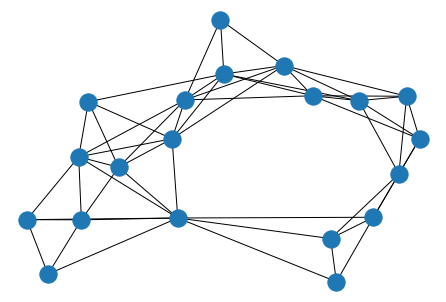

In [40]:
nx.draw(GR)